In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from math import log, sqrt

# load all the data from a csv file
def loadDataMoreInputs(fileName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    return dataNames, data

# extract a particular feature (column)
def extractFeature(allData, names, featureName):
    pos = names.index(featureName)
    return [(data[pos]) for data in allData]

# plot a histogram for some data x
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 20)
    plt.title('Histogram of ' + variableName)
    plt.show()
dataNames,data = loadDataMoreInputs("./data/surveyDataSience.csv")




In [6]:
def map_ed_to_years(str):

    if str == "Bachelor’s degree":
        return 3
    if str == "Master’s degree":
        return 5
    if str == "Doctoral degree":
        return 8
    return 0

map_to_value = {
    "< 1 years": 0.5,
    "1-3 years": 2,
    "3-5 years": 4,
    "5-10 years": 7.5,
    "10-20 years": 15,
    "20+ years": 25,
    "I have never written code": 0
}

def min_max_normalize(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]


years_of_learning = []
years_of_programing = []

for i in range(1,len(data)):
    years_of_programing.append(data[i][6])
    years_of_learning.append(map_ed_to_years(data[i][4]))


data_values = [map_to_value[interval] for interval in years_of_programing]
norm_studii = min_max_normalize(years_of_learning)
norm_prog = min_max_normalize(data_values)

print("Durata studii normalizată:", norm_studii)
print("Vechime programare normalizată:", norm_prog)



Durata studii normalizată: [0.375, 0.625, 0.625, 1.0, 1.0, 0.0, 0.0, 0.375, 0.375, 0.0, 1.0, 0.625, 0.625, 0.625, 0.375, 1.0, 0.375, 0.375, 0.625, 0.375, 0.375, 0.375, 0.625, 0.625, 0.375, 0.625, 1.0, 0.625, 0.375, 0.375, 0.375, 0.625, 0.0, 0.375, 0.375, 0.375, 0.625, 0.375, 0.0, 0.375, 0.625, 0.625, 0.625, 0.625, 0.0, 0.625, 0.0, 0.375, 0.375, 0.625, 0.0, 0.375, 0.625, 0.625, 0.625, 0.375, 0.625, 0.0, 0.375, 0.375, 0.0, 0.375, 0.625, 0.375, 0.375, 1.0, 0.0, 0.625, 0.375, 0.625, 0.375, 0.0, 0.625, 0.625, 0.625, 1.0, 0.625, 0.625, 1.0, 0.375, 0.0, 0.625, 0.625, 0.625, 0.0, 0.375, 0.625, 0.625, 0.375, 0.375, 0.625, 0.625, 0.625, 0.375, 0.375, 0.375, 0.625, 0.625, 0.375, 0.625, 0.0, 0.625, 0.375, 0.375, 0.625, 1.0, 0.625, 0.625, 0.375, 0.375, 0.375, 0.625, 0.625, 0.0, 0.375, 1.0, 0.375, 0.625, 0.375, 0.625, 0.0, 0.625, 0.625, 0.625, 0.625, 0.375, 1.0, 1.0, 0.0, 1.0, 0.625, 0.0, 0.625, 1.0, 0.625, 0.625, 0.625, 0.375, 0.375, 0.375, 0.0, 0.625, 0.0, 0.0, 0.625, 0.375, 0.375, 0.625, 0.375, 0

In [13]:
import pandas as pd
from PIL import Image, ImageFilter
import os
import numpy as np
import matplotlib.pyplot as plt



path = "./data/images"
file_list = os.listdir(path)

In [15]:
import pandas as pd
from PIL import Image, ImageFilter
import os
import numpy as np
import matplotlib.pyplot as plt


path = "./data/images"
file_list = os.listdir(path)



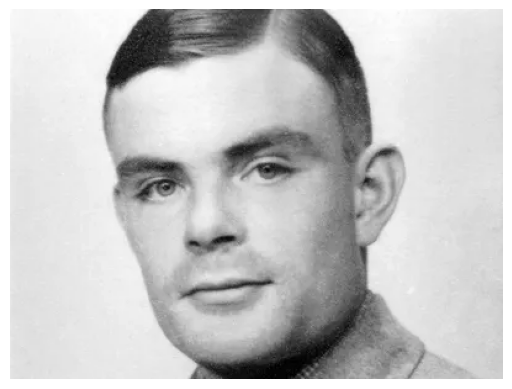

In [ ]:

all_pixel_values = []

for img_name in file_list:
    img_path = os.path.join(path, img_name)
    image = Image.open(img_path)  
    image_array = np.array(image)
    all_pixel_values.append(image_array)


all_pixel_values = np.concatenate([img.flatten() for img in all_pixel_values])


mean = np.mean(all_pixel_values)
std = np.std(all_pixel_values)


normalized_images = []
for img_name in file_list:
    img_path = os.path.join(path, img_name)
    image = Image.open(img_path)
    image_array = np.array(image)
    normalized_image_array = (image_array - mean) / std
    normalized_image = Image.fromarray(np.uint8((normalized_image_array - np.min(normalized_image_array)) * 255 / (np.max(normalized_image_array) - np.min(normalized_image_array))))
    normalized_images.append(normalized_image)

plt.imshow(normalized_images[0])
plt.axis('off') 
plt.show()



In [19]:
import pandas as pd
import nltk
import os
import matplotlib.pyplot as plt
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import wordnet
import re
import math

text = ""
with open('./data/texts.txt', 'r', encoding='utf-8') as file:
    text = file.read()


sentences = sent_tokenize(text)


data = []


for sentence in sentences:

    words = word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha()]
    

    word_freq = nltk.FreqDist(words)
    

    log_scaled_freq = {word: math.log(freq + 1) for word, freq in word_freq.items()}


    data.append({'sentence': sentence, 'normalized_freq': log_scaled_freq})

df = pd.DataFrame(data)

print(df)


                                            sentence  \
0  Mesaj de informare: \nCursul și laboratoarele ...   
1  Suntem convinși că veți realiza proiecte \nfoa...   
2  Vă încurajăm să adresați întrebări atunci \ncâ...   
3  Dacă ați citit până aici, vă rugăm să lăsați u...   
4  --\nMesaj de informare generat de ChatGPT:\nSt...   
5  Această experiență va \nfi o adevărată provoca...   
6  Vă încurajăm să fiți activi și să adresați înt...   
7  Fie că este vorba de o discuție în timp real \...   
8                  Succes și să înceapă aventura AI!   
9  Cu considerație, Echipa de Inteligență Artific...   

                                     normalized_freq  
0  {'mesaj': 0.6931471805599453, 'de': 1.09861228...  
1  {'suntem': 0.6931471805599453, 'convinși': 0.6...  
2  {'vă': 0.6931471805599453, 'încurajăm': 0.6931...  
3  {'dacă': 0.6931471805599453, 'ați': 0.69314718...  
4  {'mesaj': 0.6931471805599453, 'de': 1.38629436...  
5  {'această': 0.6931471805599453, 'experiență': ... 